**Let's look at sea surface temperature data from a inshore mooring from the Ocean Observatories Initiative before, during, and after the passage of Hurricane Michael**

Below is a link to Michael's track. We will be focusing on the time period when Michael is undergoing extratropical transition off the coast of New England

[Hurricane Michael's track](https://raw.githubusercontent.com/jrudzin/python_data_analysis/master/Hurricane_Michael_NHCtrack.PNG)


In [0]:
# First, let's import the Python libraries we will need
import requests
import datetime
import matplotlib.pyplot as plt
import json
import pandas as pd

# API Information
USERNAME ='OOIAPI-G2GBHHAQHYQTLM'
TOKEN= 'BSDYYV4S1W5JD4'
API_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

In [0]:
# Instrument Information
site = 'CP03ISSM' 
node = 'SBD11'
instrument = '06-METBKA000'
method = 'telemetered'
stream = 'metbk_a_dcl_instrument'

In [0]:
data_request_url ='/'.join((API_BASE_URL,site,node,instrument,method,stream))

params = {
  'beginDT':'2018-10-05T00:00:00.000Z',
  'endDT':'2018-10-25T00:00:00.000Z',
  'limit':2000,   
}

In [0]:
# Grab the data
r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
data = r.json()

In [0]:
# Time Processing Routine
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def ntp_seconds_to_datetime(ntp_seconds):
    return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)

In [14]:
data[0]

{'air_temperature': 20.04199981689453,
 'air_temperature_qc_executed': 29,
 'air_temperature_qc_results': 29,
 'barometric_pressure': 1014.8800048828125,
 'barometric_pressure_qc_executed': 29,
 'barometric_pressure_qc_results': 29,
 'ct_depth': 0.98,
 'dcl_controller_timestamp': 'empty',
 'driver_timestamp': 3747691657.461507,
 'eastward_wind_velocity': 1.6200000047683716,
 'eastward_wind_velocity_qc_executed': 29,
 'eastward_wind_velocity_qc_results': 29,
 'ingestion_timestamp': 3747691657.6140003,
 'internal_timestamp': 0.0,
 'longwave_irradiance': 364.79998779296875,
 'longwave_irradiance_qc_executed': 29,
 'longwave_irradiance_qc_results': 29,
 'met_barpres': 101488.0,
 'met_barpres_qc_executed': 29,
 'met_barpres_qc_results': 29,
 'met_current_direction': 44.52542330467338,
 'met_current_direction_qc_executed': 29,
 'met_current_direction_qc_results': 29,
 'met_current_speed': 0.10885090679754376,
 'met_current_speed_qc_executed': 29,
 'met_current_speed_qc_results': 29,
 'met_he

In [0]:
# Process the data
# First, create empty arrays to put data in

In [0]:
time = []
temp = []

In [0]:
# Next put data that is read in in those arrays

In [0]:
for i in range(len(data)):
  time.append(ntp_seconds_to_datetime(data[i]['time']))
  temp.append(data[i]['sea_surface_temperature'])


In [0]:
#Now lets plot the sea surface temperature for the time before, during, and after Michael passed this mooring

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


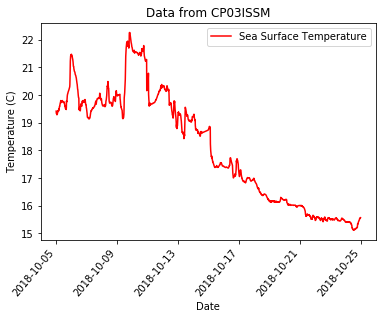

In [20]:
plt.plot_date(time, temp, 'r',label='Sea Surface Temperature');
plt.xlabel('Date');
plt.ylabel('Temperature (C)');
plt.title('Data from %s' % (site));
plt.legend(frameon=1, facecolor='w');
plt.xticks(rotation=50,ha='right');

Michael passed this mooring around October 12th. Notice the large peak in sea surface temperature and then it drops dramatically. Usually, storm extract energy from the ocean and cool it. It is interesting that the sea surface temperature actually increases before it does. However, this mooring in located near the shore in only 90m of water. Many complexe processes could be at play here. Additionally, the cyclonic wind stress from the storm could be pushing waters from the warm Gulf Stream onto shore. This is where data analysis and critical thinking come into play to figure out the mystery! 

Let's look at the wind and ocean current direction - if the winds and current are blowing on-shore, this could be a clue

In [0]:
winddir=[];
currdir=[];
for i in range(len(data)):
  winddir.append(data[i]['met_relwind_direction'])
  currdir.append(data[i]['met_current_direction'])


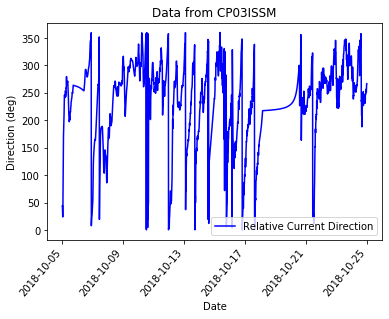

In [46]:
#plt.plot_date(time, winddir, 'r',label='Relative Wind Direction');
plt.plot_date(time, currdir, 'b',label='Relative Current Direction');
plt.xlabel('Date');
plt.ylabel('Direction (deg)');
plt.title('Data from %s' % (site));
plt.legend(frameon=1, facecolor='w');
plt.xticks(rotation=50,ha='right');


Let's look at the offshore mooring for the same time period to see if there is a difference. 

In [0]:
# Instrument Information
site2 = 'CP04OSSM' 
node = 'SBD11'
instrument = '06-METBKA000'
method = 'telemetered'
stream = 'metbk_a_dcl_instrument'

In [0]:
data_request_url ='/'.join((API_BASE_URL,site2,node,instrument,method,stream))

params = {
  'beginDT':'2018-10-05T00:00:00.000Z',
  'endDT':'2018-10-25T00:00:00.000Z',
  'limit':2000,   
}

In [0]:
# Grab the data
r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
data2 = r.json()

In [0]:
# Time Processing Routine
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def ntp_seconds_to_datetime(ntp_seconds):
    return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)

In [25]:
data2[0]

{'air_temperature': 21.3700008392334,
 'air_temperature_qc_executed': 29,
 'air_temperature_qc_results': 29,
 'barometric_pressure': 1014.8099975585938,
 'barometric_pressure_qc_executed': 29,
 'barometric_pressure_qc_results': 29,
 'ct_depth': 0.98,
 'dcl_controller_timestamp': 'empty',
 'driver_timestamp': 3747691674.249662,
 'eastward_wind_velocity': 4.0,
 'eastward_wind_velocity_qc_executed': 29,
 'eastward_wind_velocity_qc_results': 29,
 'ingestion_timestamp': 3747691674.3900003,
 'internal_timestamp': 0.0,
 'longwave_irradiance': 359.79998779296875,
 'longwave_irradiance_qc_executed': 29,
 'longwave_irradiance_qc_results': 29,
 'met_barpres': 101481.0,
 'met_barpres_qc_executed': 29,
 'met_barpres_qc_results': 29,
 'met_current_direction': 155.22276720152047,
 'met_current_direction_qc_executed': 29,
 'met_current_direction_qc_results': 29,
 'met_current_speed': 0.1190504094911059,
 'met_current_speed_qc_executed': 29,
 'met_current_speed_qc_results': 29,
 'met_heatflx_minute': n

In [0]:
time2 = []
temp2 = []

In [0]:
for i in range(len(data2)):
  time2.append(ntp_seconds_to_datetime(data2[i]['time']))
  temp2.append(data2[i]['sea_surface_temperature'])

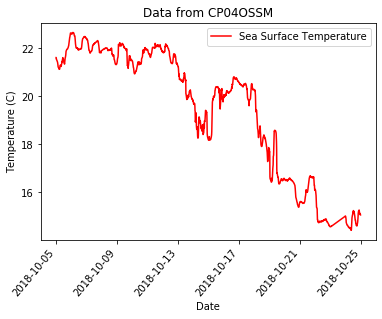

In [36]:
#Plot offshore mooring SST
plt.plot_date(time2, temp2, 'r',label='Sea Surface Temperature');
plt.xlabel('Date');
plt.ylabel('Temperature (C)');
plt.title('Data from %s' % (site2));
plt.legend(frameon=1, facecolor='w');
plt.xticks(rotation=50,ha='right');


Notice that the pre-storm sea surface temperature is warmer than the inshore mooring surface temperature. Also notice that the temperature a approximately the same at both locations during the time Michael passes through. However, the inshore mooring temperature cools much more quickly than the offshore mooring by October 17th. The water actually warms back up during the time. 